# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [2]:
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import rv_discrete
from scipy.stats import rv_continuous

import math
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [3]:
basket = list(set((['Apple'] * 60) + (['Orange'] * 40)))

In [4]:
"""
Calculate:
p = probability that the fruit is an apple 60%
q = probability that the fruit is an orange 40%
"""

p = 60
q = 40
total = p + q

prob_p = p / total
prob_q = q / total

print(f'{prob_p}, {prob_q}')

0.6, 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is placed in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [5]:
prob_five_apples = prob_p**5
prob_five_apples_plus = prob_p**5 * prob_q**15
print(f'The probability of having the first 5 pickings as apples are {prob_five_apples}')
print(f'The probability of having the first 5 pickings as apples and then 15 oranges is {prob_five_apples_plus}')

The probability of having the first 5 pickings as apples are 0.07775999999999998
The probability of having the first 5 pickings as apples and then 15 oranges is 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [6]:
fact_ttl = math.factorial(20)
fact_p_tries = math.factorial(5)
fact_q_tries = math.factorial(15)
fact_tw_min_fi = math.factorial(20 - 5)
fact_tw_min_fitn = math.factorial(20 - 15)

prob_per_try_p = (prob_p**5) * ((1 - prob_p)**(20-5)) #probability for each try in apples
prob_per_try_q = (prob_q**15) * ((1 - prob_q)**(20-15)) #probability for each try in oranges
out_p = fact_ttl / (fact_p_tries * fact_tw_min_fi) #possible outcomes with the result we want
out_q = fact_ttl / (fact_q_tries * fact_tw_min_fitn) #possible outcomes with the result we want
prob_p_five = prob_per_try_p * out_p #probability of 5 apples
prob_q_fitn = prob_per_try_q * out_q #probability of 15 oranges
ttl_prob = prob_p_five * prob_q_fitn # the final probability for the desired outcome


print(prob_per_try_p)
print(prob_per_try_q)
print(out_p)
print(out_q)
print(prob_p_five)
print(prob_q_fitn)
print(f'The probability of a sample that contains 5 apples and 15 oranges is {ttl_prob}')

8.349416423424006e-08
8.349416423424006e-08
15504.0
15504.0
0.0012944935222876579
0.0012944935222876579
The probability of a sample that contains 5 apples and 15 oranges is 1.675713479244707e-06


In [22]:
from scipy.stats import binom
# Probability mass function; pmf(k, n, p, loc=0)
# Where k=successes, n= no. of independent trials, p=probability of success

#For 5 apples
# binomial = binom(20, 0.6)
# apple_5 = binomial.pmf(5)
apples5 = binom.pmf(5,20,0.60)

#For 15 oranges
# binomial = binom(20, 0.4)
# orange_15 = binomial.pmf(15)
oranges15=binom.pmf(15,20,0.40)

P_apples5_oranges15=apples5*oranges15
print(P_apples5_oranges15)

1.6757134792446896e-06


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [7]:
fact_ttl = math.factorial(20)
fact_four = math.factorial(4)
fact_three = math.factorial(3)

prob_four = (prob_p**4) * ((1 - prob_p)**(20-4)) #probability for each try in apples (with 4 tries)
prob_three = (prob_p**3) * ((1 - prob_p)**(20-3)) #probability for each try in apples (with 3 tries)
prob_two = (prob_p**2) * ((1 - prob_p)**(20-2)) #probability for each try in apples (with 2 tries)
prob_one = (prob_p**1) * ((1 - prob_p)**(20-1)) #probability for each try in apples (with 1 tries)

out_four = fact_ttl / (fact_four * math.factorial(20 - 4)) #possible outcomes with the result we want
out_three = fact_ttl / (fact_three * math.factorial(20 - 3))
out_two = fact_ttl / (2 * math.factorial(20 - 2))
out_one = fact_ttl / (1 * math.factorial(20 - 1))

ttl_prob_four = prob_four * out_four
ttl_prob_three = prob_three * out_three
ttl_prob_two = prob_two * out_two
ttl_prob_one = prob_one * out_one
ttl_prob = ttl_prob_four + ttl_prob_three + ttl_prob_two + ttl_prob_one

print(ttl_prob)

0.0003170201260523523


In [23]:
# cumulative distribution will return the cumulative probability from 5 to 0 (everything below 5)
# cdf(k, n, p, loc=0)

P_cum_apples5 = binom.cdf(4,20,0.60)
print(P_cum_apples5)

0.0003170311211686301


**Plot the PDF (probability distribution function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

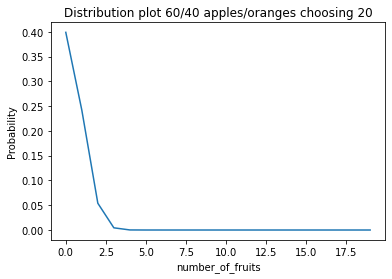

In [40]:
# your code here
x= np.arange(0,20)
plt.plot(x, norm.pdf(x))

# Please label the axes and give a title to the plot 
plt.title('Distribution plot 60/40 apples/oranges choosing 20')
plt.xlabel('number_of_fruits')
plt.ylabel('Probability')
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [9]:
#poisson.pmf(value,mean)
poisson.pmf(5,2.3)

0.053775025581946814

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

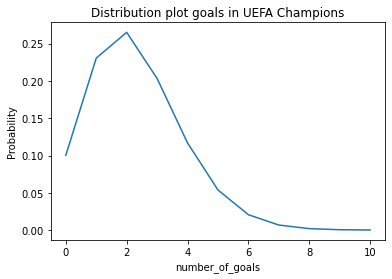

In [31]:
# create a range of numbers we want to study 0-10
x = np.arange(0,11)

#generate probabilities for every value from 0-10 (i) with mean 2.3, so we can draw the lines between points
poisson_dist = [poisson.pmf(i,2.3) for i in  x]

#plot the lines
plt.plot(poisson_dist,label = "Poisson Distribution with mean 2.3")

# Please label the axes and give a title to the plot 
plt.title('Distribution plot goals in UEFA Champions')
plt.xlabel('number_of_goals')
plt.ylabel('Probability')
plt.show()

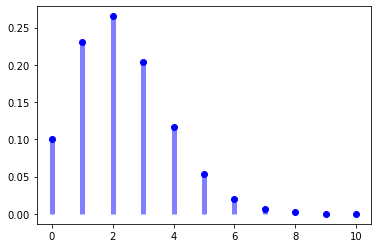

In [34]:
#fancy way of doing the same

# create a range of numbers we want to study 0-10
x = np.arange(0,11)

#generate probabilities for every value from 0-10 (i) with mean 2.3, so we can draw the lines between points
poisson_dist = [poisson.pmf(i,2.3) for i in  x]

plt.plot(x, poisson_dist, 'bo')
plt.vlines(x, 0, poisson_dist, colors='b', lw = 5, alpha=0.5)
plt.show()